In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
trunk_layers = [1] + [256] + [8]

trunk_modules = []
for i in range(len(trunk_layers)-2):
    trunk_modules.append(nn.Linear(trunk_layers[i], trunk_layers[i+1]))
    trunk_modules.append(nn.ReLU())
trunk_modules.append(nn.Linear(trunk_layers[-2], trunk_layers[-1]))

trunk = nn.Sequential(*trunk_modules)
trunk.load_state_dict(torch.load('data/20k100e10mixed/model/10000_model_0_1_bias_dataset_20k_100e_10mixed.model')['T'][0])

<All keys matched successfully>

In [3]:
#  Replicate net in numpy

modules_0 = []
for i in range(len(trunk_layers)-1):
    modules_0.append((trunk[2*i].weight.clone().detach().numpy(), trunk[2*i].bias.clone().detach().numpy()))

def np_trunk(x, modules):
    for (W, b) in modules[:-1]:
        x = (x @ W.T + b).clip(min=0.0)
    W, b = modules[-1]
    return x@W.T + b

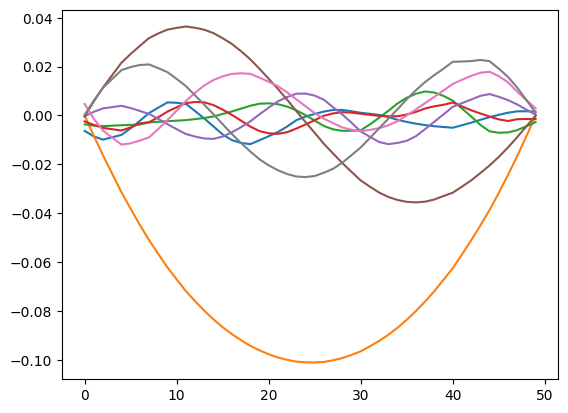

In [4]:
x = np.linspace(0, 1, 50).reshape((-1, 1))

plt.plot(np_trunk(x, modules_0))
plt.show()

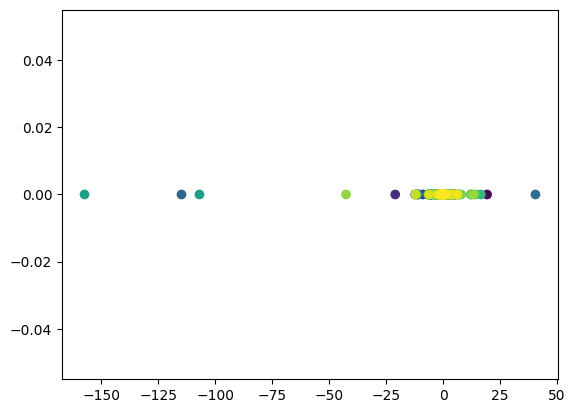

In [5]:
sz = trunk_layers[1]
plt.scatter(-modules_0[0][1]/modules_0[0][0].T, [0]*sz, c=np.linspace(0, 1, sz))
plt.show()

non-zero weights 1.0
positive heavier weight at: 24 with weight [1.0018038]
negative heavier weight at:  80 with weight [-0.9738442]


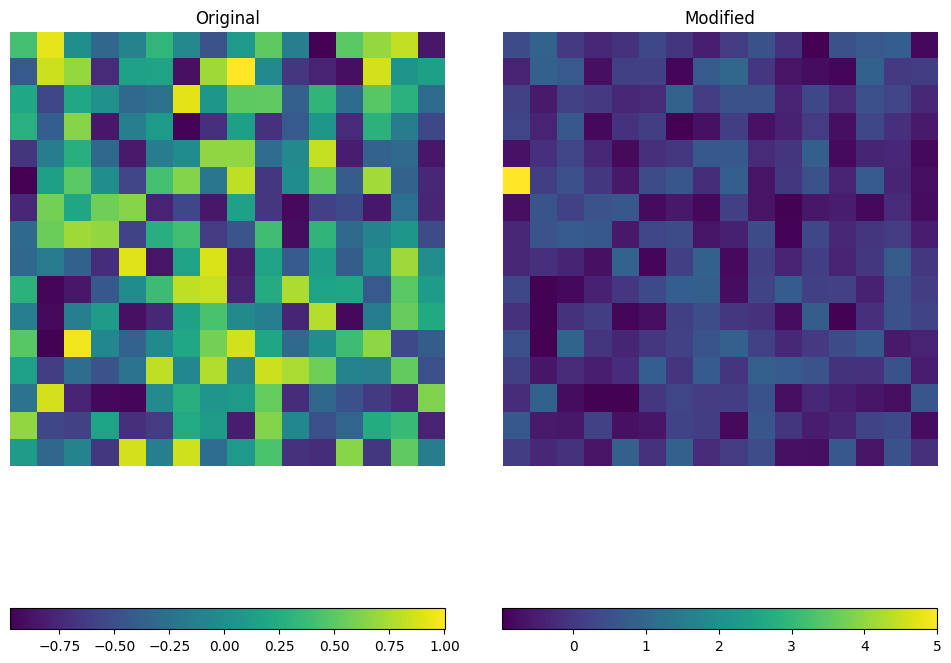

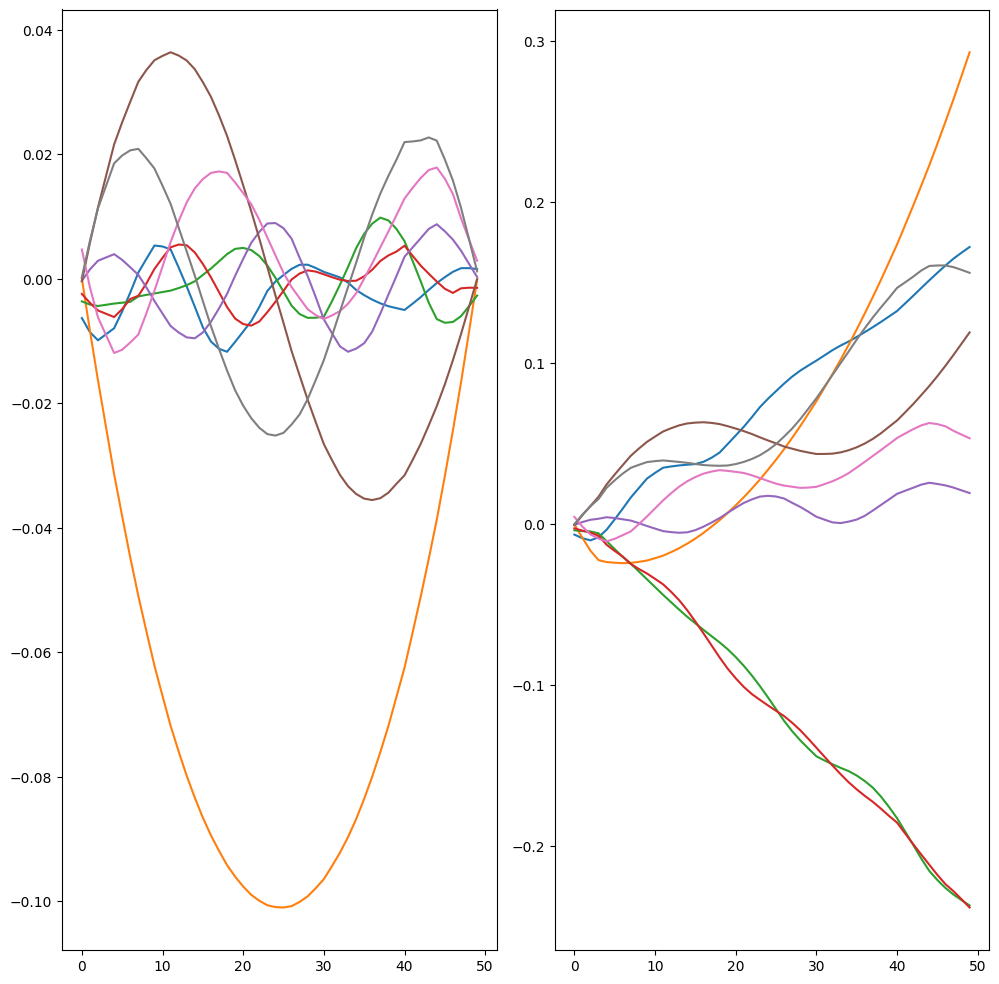

In [15]:
modules_1 = []
for (W, b) in modules_0:
    modules_1.append((np.array(W), np.array(b)))

W, b = modules_1[0]

print('non-zero weights', np.count_nonzero(W) / W.size)

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))
fig.tight_layout()

p = ax[0].imshow(W.reshape(16, 16))
ax[0].axis('off')
ax[0].set_title('Original')
fig.colorbar(p, ax=ax[0], location='bottom')

ind = np.argmax(W)
print('positive heavier weight at:', ind, 'with weight', W[ind])

# W[ind] = -5*np.ones_like(W[ind])

# ind2 = np.argmin(W)
# print('negative heavier weight at: ', ind2, 'with weight', W[ind2])
# W[ind2] = 5*np.ones_like(W[ind2])

# print('non-zero weights (modified)', np.count_nonzero(W) / W.size)

p = ax[1].imshow(W.reshape(16, 16))
ax[1].axis('off')
ax[1].set_title('Modified')
fig.colorbar(p, ax=ax[1], location='bottom')

plt.show()

#  plot learned eigenfunctions
fig, ax = plt.subplots(ncols=2, figsize=(10, 10))
fig.tight_layout()

ax[1].plot(np_trunk(x, modules_1))
ax[0].plot(np_trunk(x, modules_0))
plt.show()